In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from timeit import default_timer as timer

import importlib
import utils
import networks

# change the default figure size
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams.update({'font.size': 16})

In [21]:
weights = [[0.5, 0.25, 0.25], [0.25, 0.5, 0.25], [0.25, 0.25, 0.5], [0.7, 0.15, 0.15], [0.15, 0.7, 0.15], [0.15, 0.15, 0.7], [1, 1, 1]]
n_epochs = 5000
key = 'Data_Loss'

pinn_loss = pd.read_csv('test_final_performance/pinn/average_loss.csv')['Average_MSE_Loss'].to_numpy()
ipinn_loss = pd.read_csv('test_final_performance/ipinn/average_loss.csv')['Average_MSE_Loss'].to_numpy()

def extract_data(model_type, key):
    hists = []
    for w in weights:
        all_loss_hist = []
        for j in range(1, 8):
            path = f'test_loss_weights/{model_type}/loss{j}/{w[0]}-{w[1]}-{w[2]}.csv'
            data = pd.read_csv(path)
            all_loss_hist.append(data[key].to_numpy())
        
        # Compute averages
        hists.append(pd.DataFrame(all_loss_hist).mean(axis=0))
    return hists
def plot_data(plot_hists, model_type, log=False):
    fig = plt.figure(figsize=(12,9))
    for idx, weight in enumerate(weights):
        hist_data = np.log(plot_hists[idx]) if log else plot_hists[idx]
        plt.plot(range(n_epochs), hist_data, label=f'w1: {weight[0]}, w2: {weight[1]}, w3: {weight[2]}')
    plt.xlabel('epochs')
    plt.ylabel('Logarithm Loss' if log else 'Loss')
    plt.legend()
    plt.title(f'{model_type} Training {"logarithm " if log else ""}{key} Loss')
    plt.grid(True)
    plt.savefig(f'test_loss_weights/plot/{model_type} Training {"logarithm " if log else ""}{key}.png', bbox_inches='tight')

pinn_hists = extract_data('pinn', key)
ipinn_hists = extract_data('ipinn', key)

# PINN Weights difference

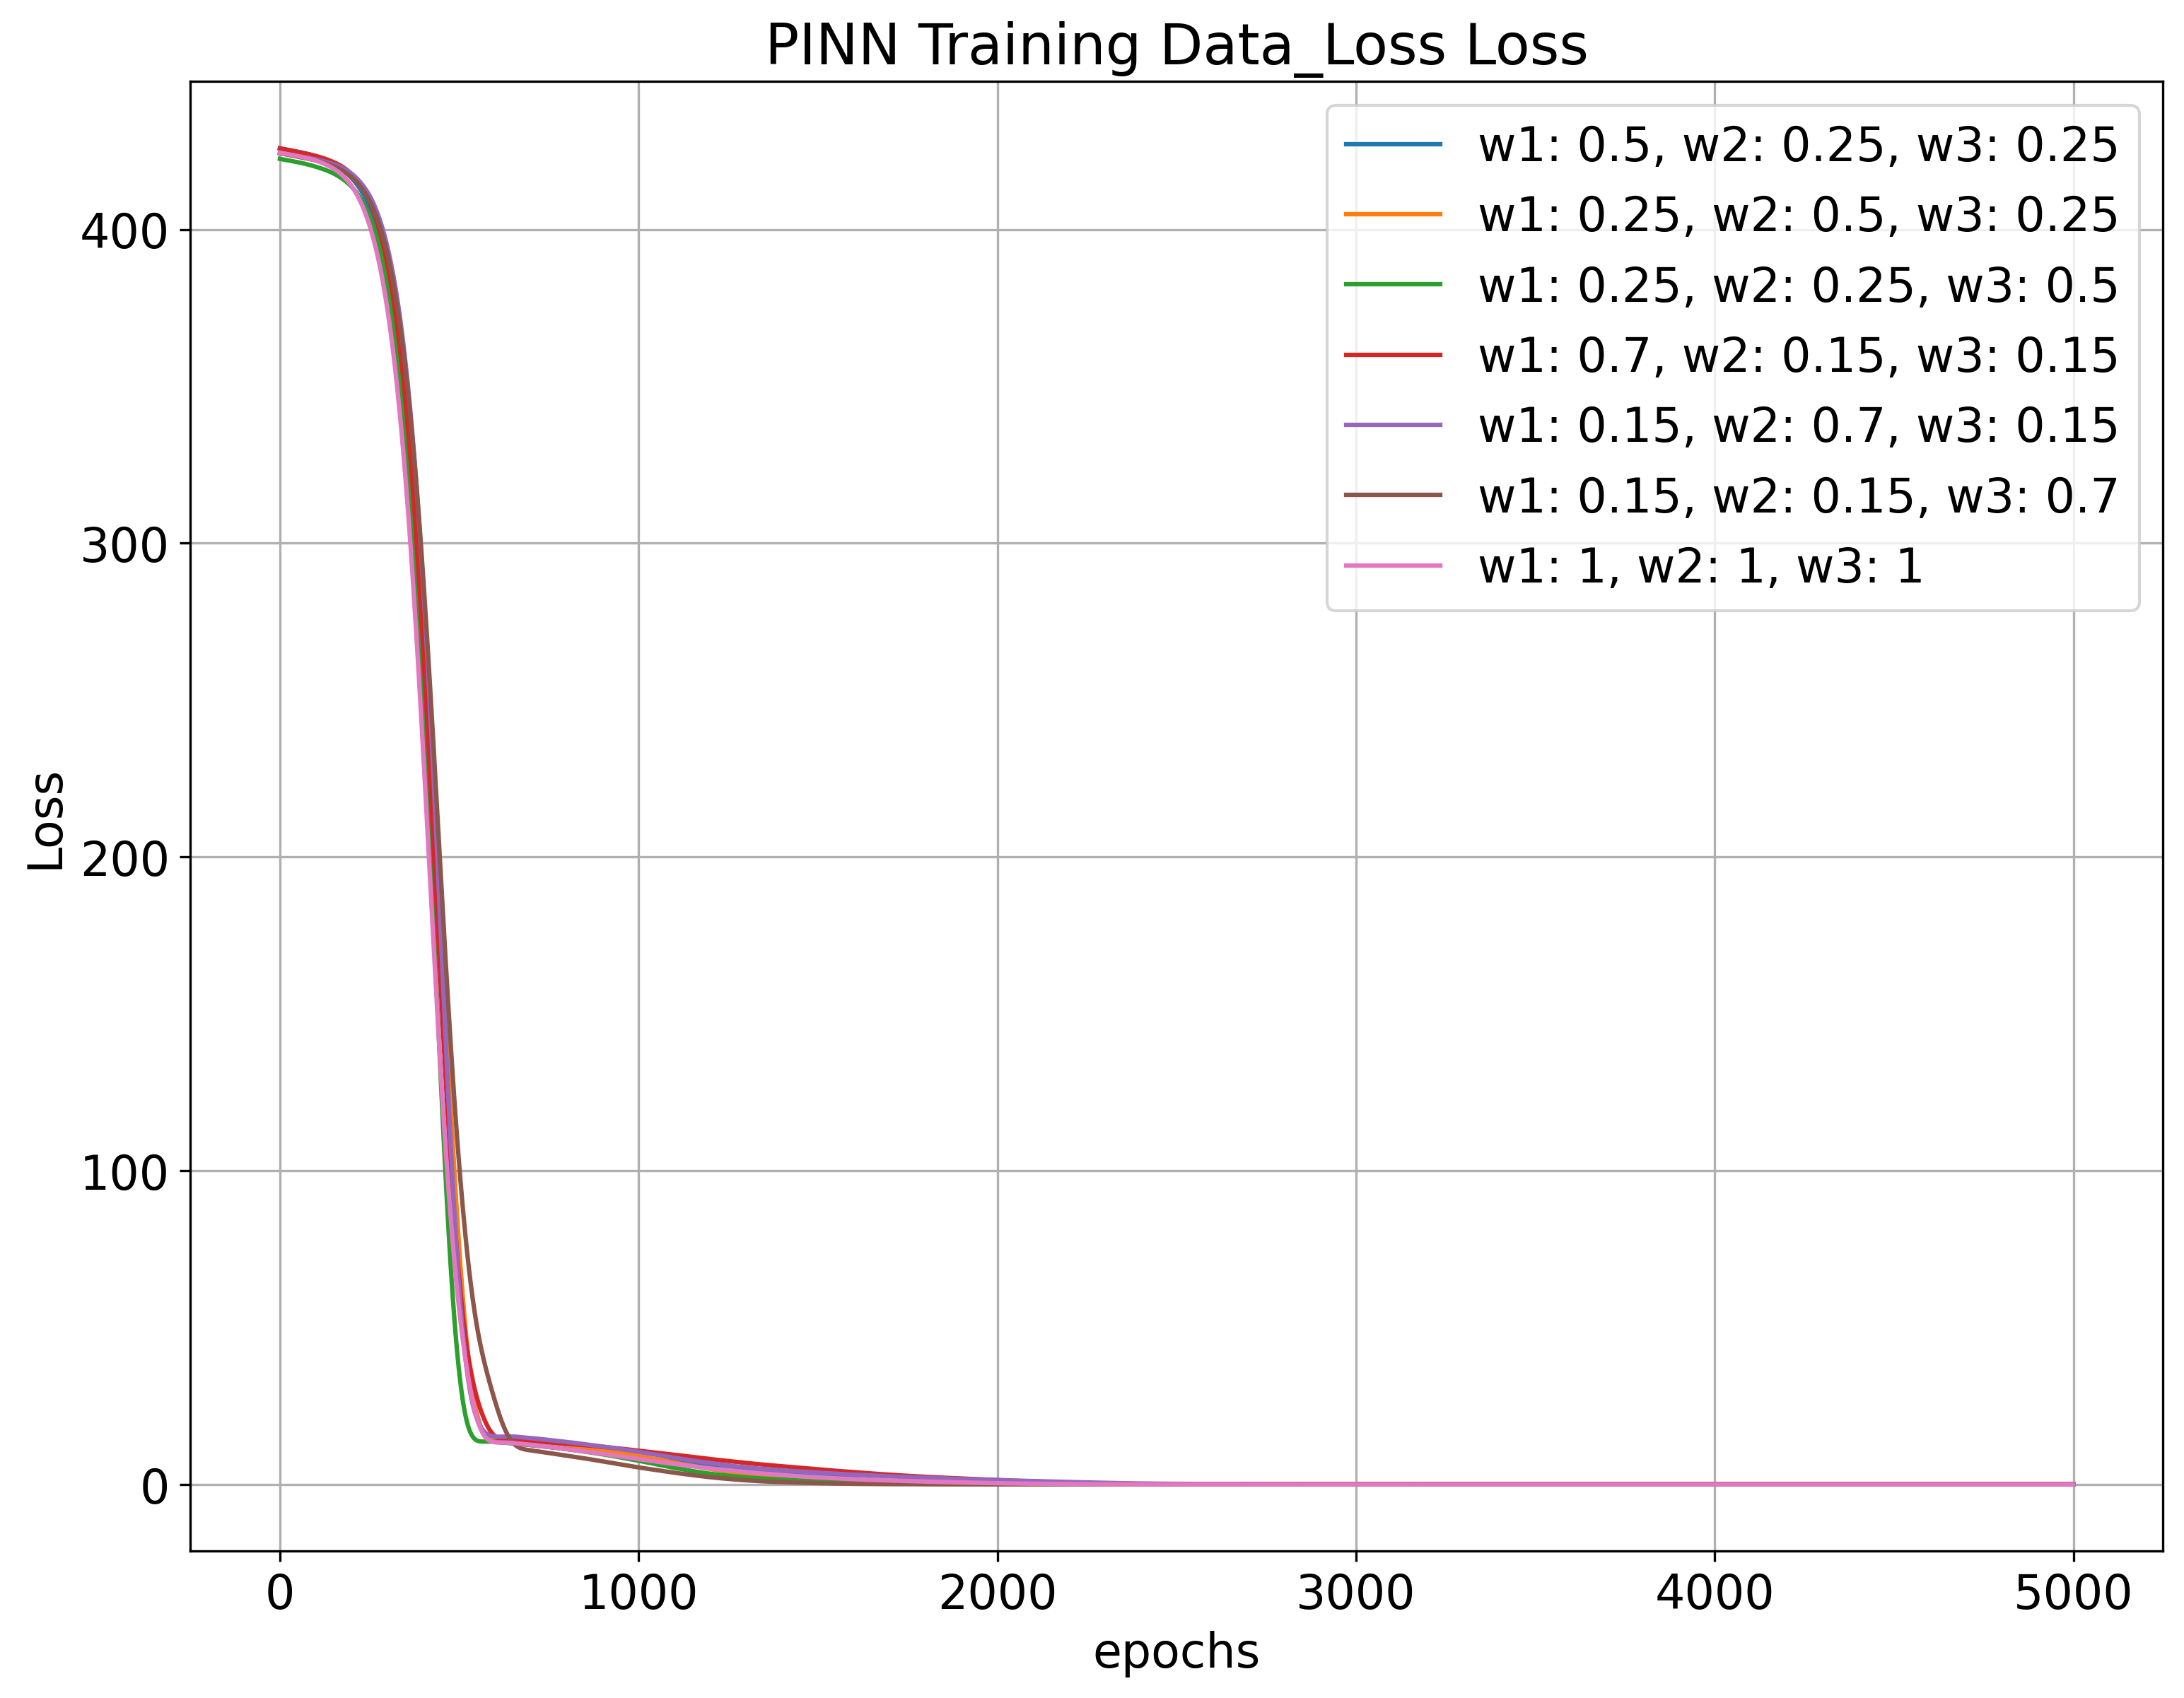

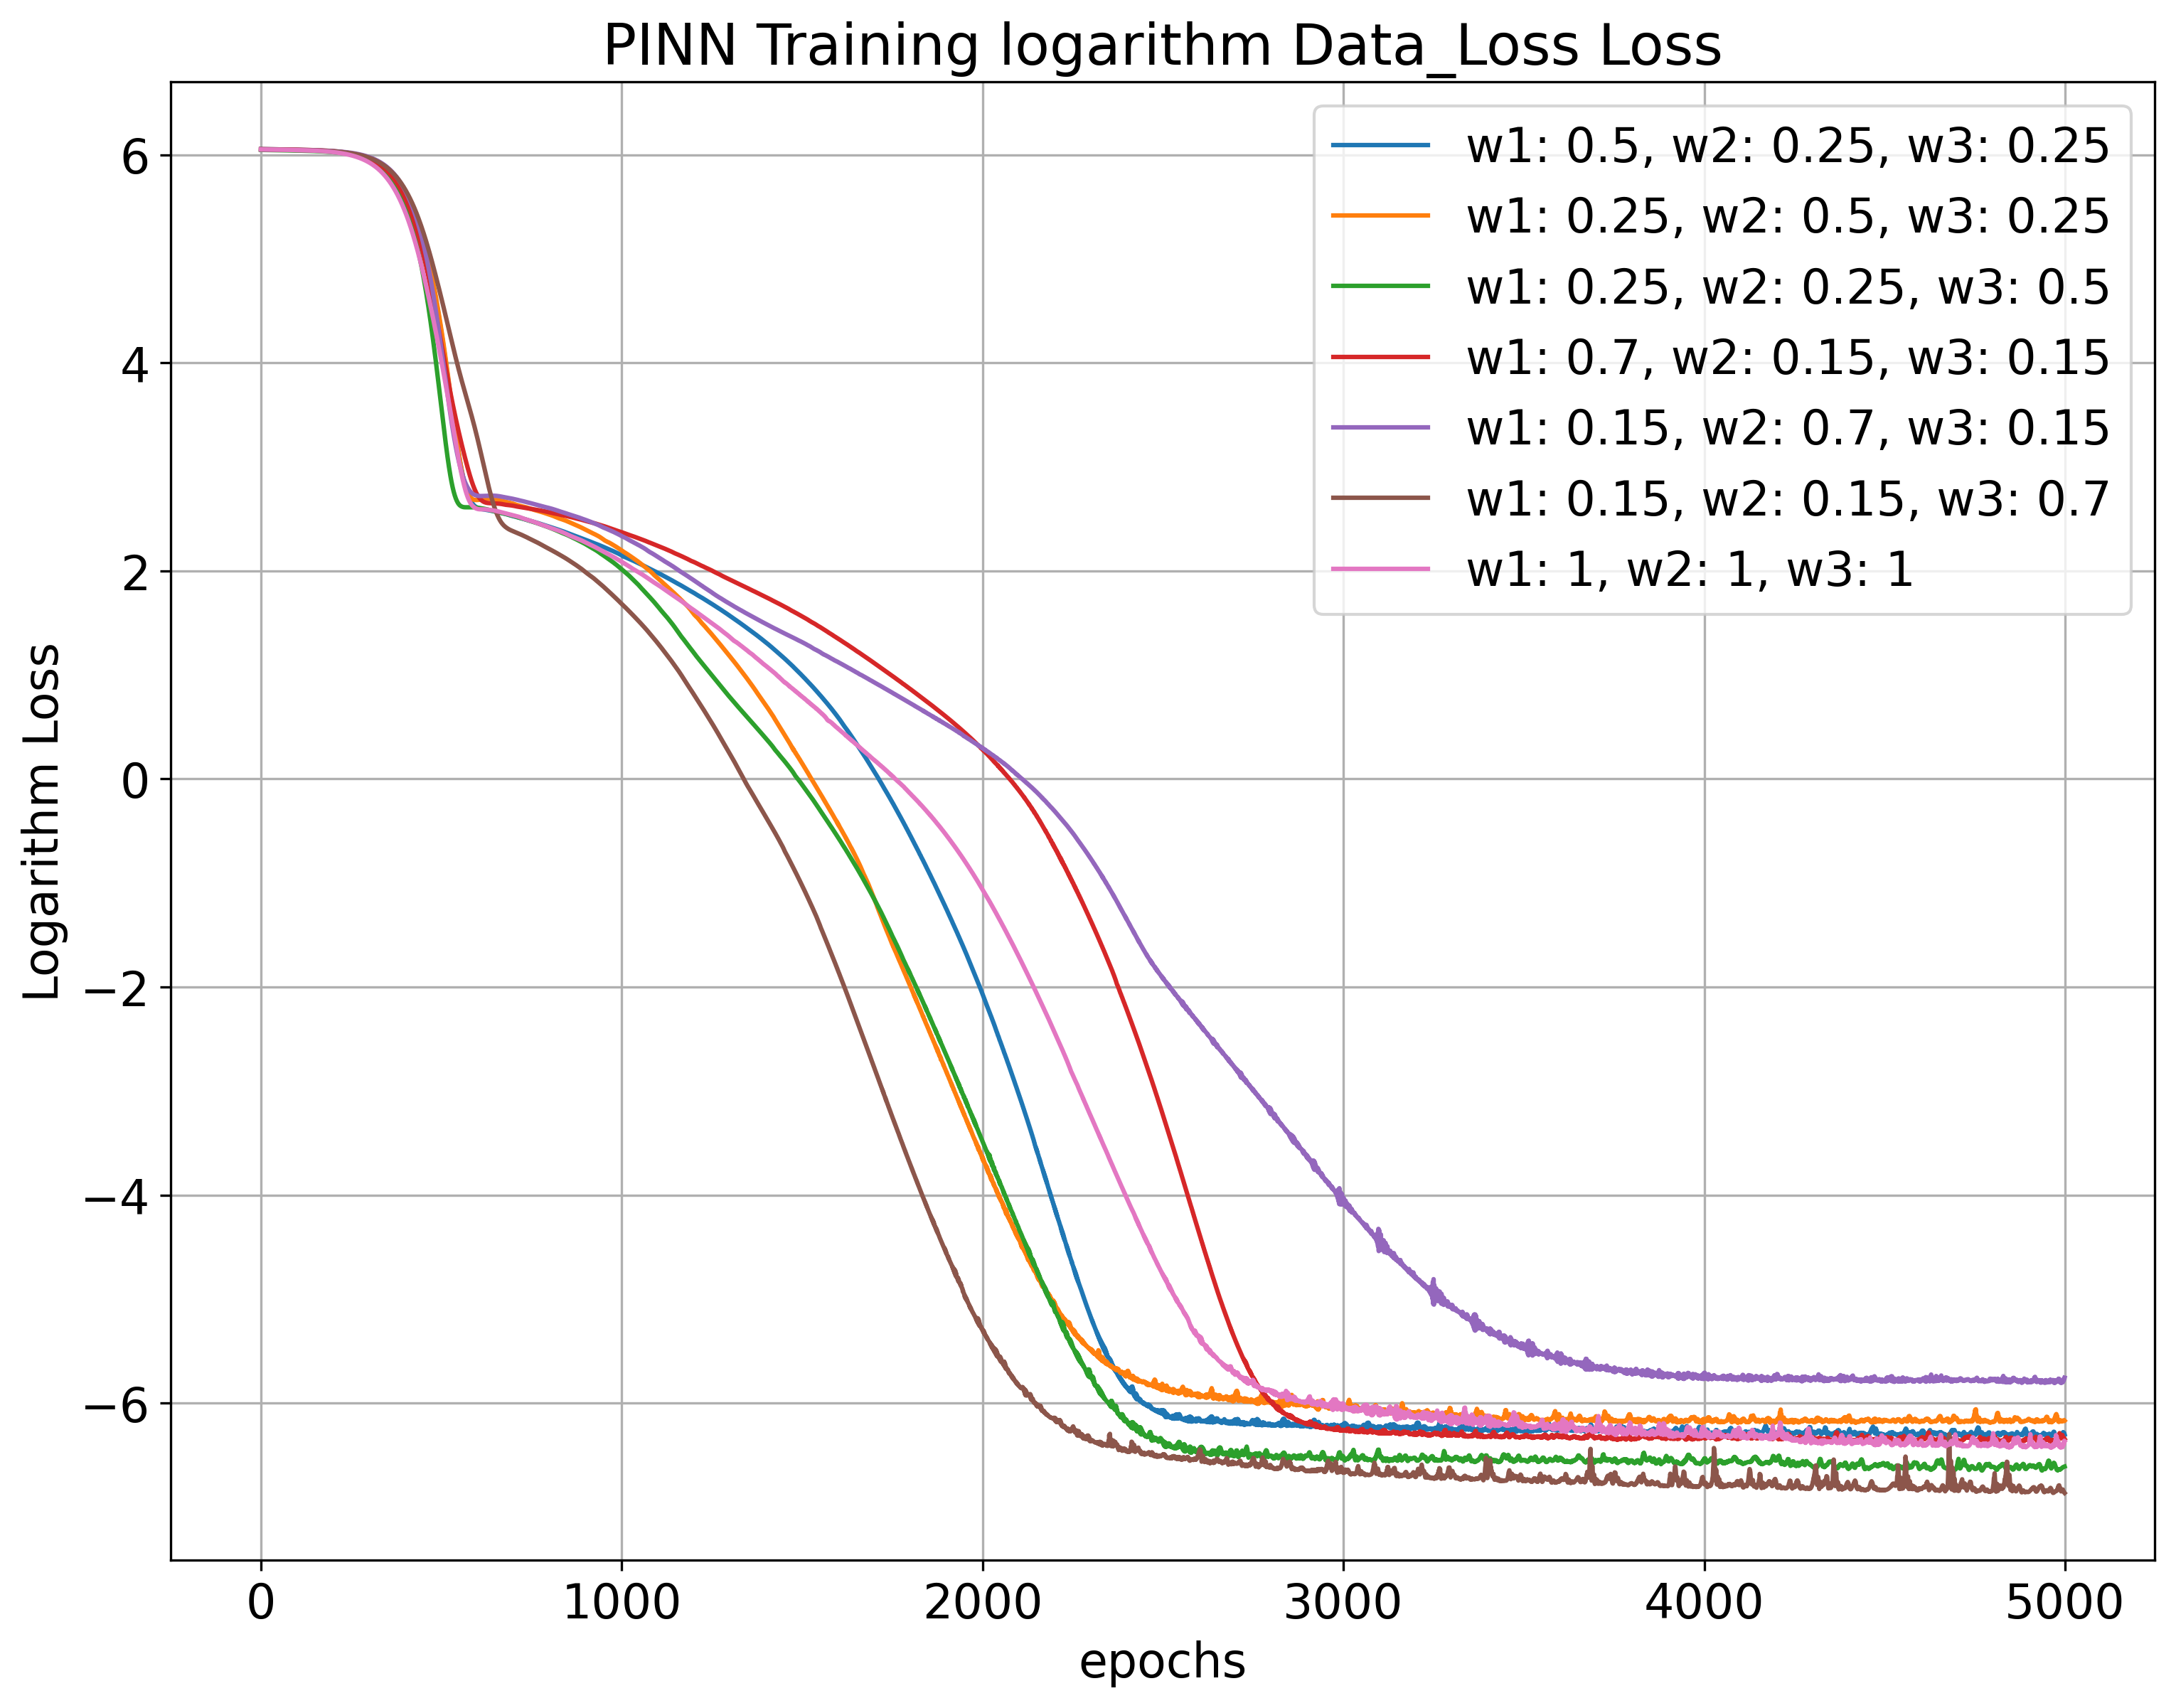

In [24]:
plot_data(pinn_hists, 'PINN')
plot_data(pinn_hists, 'PINN', log=True)

# IPINN Weight Difference

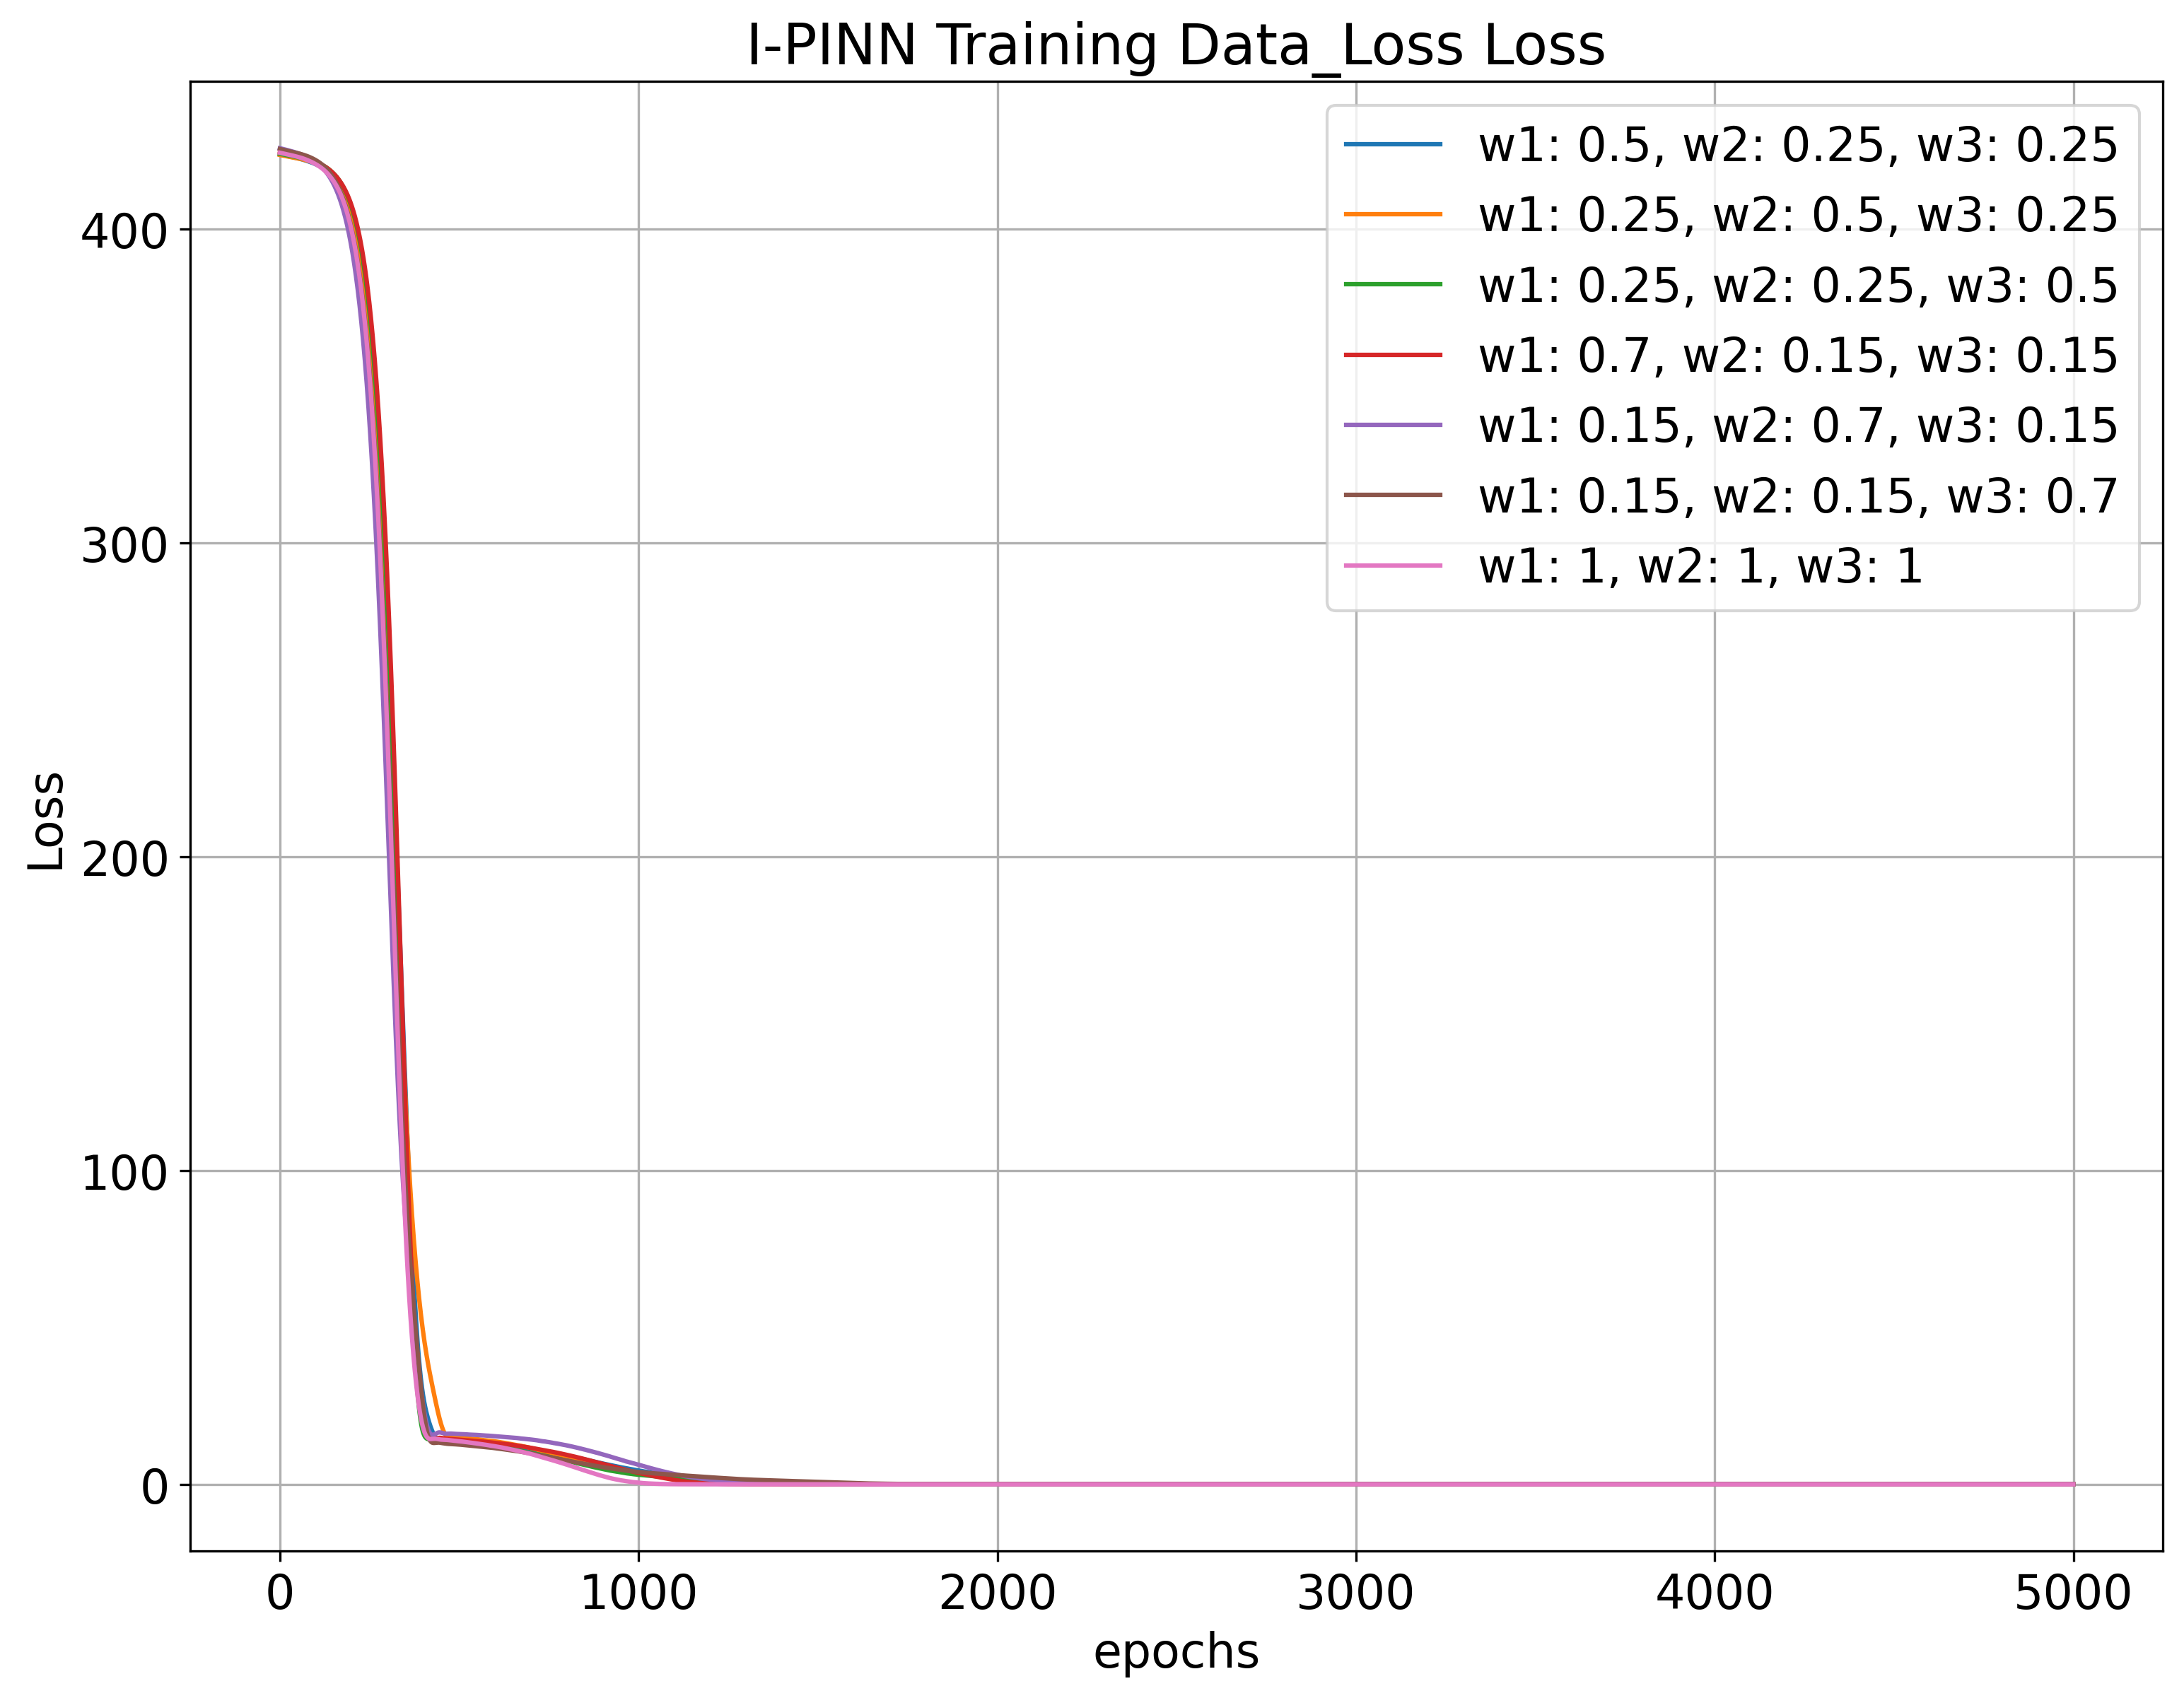

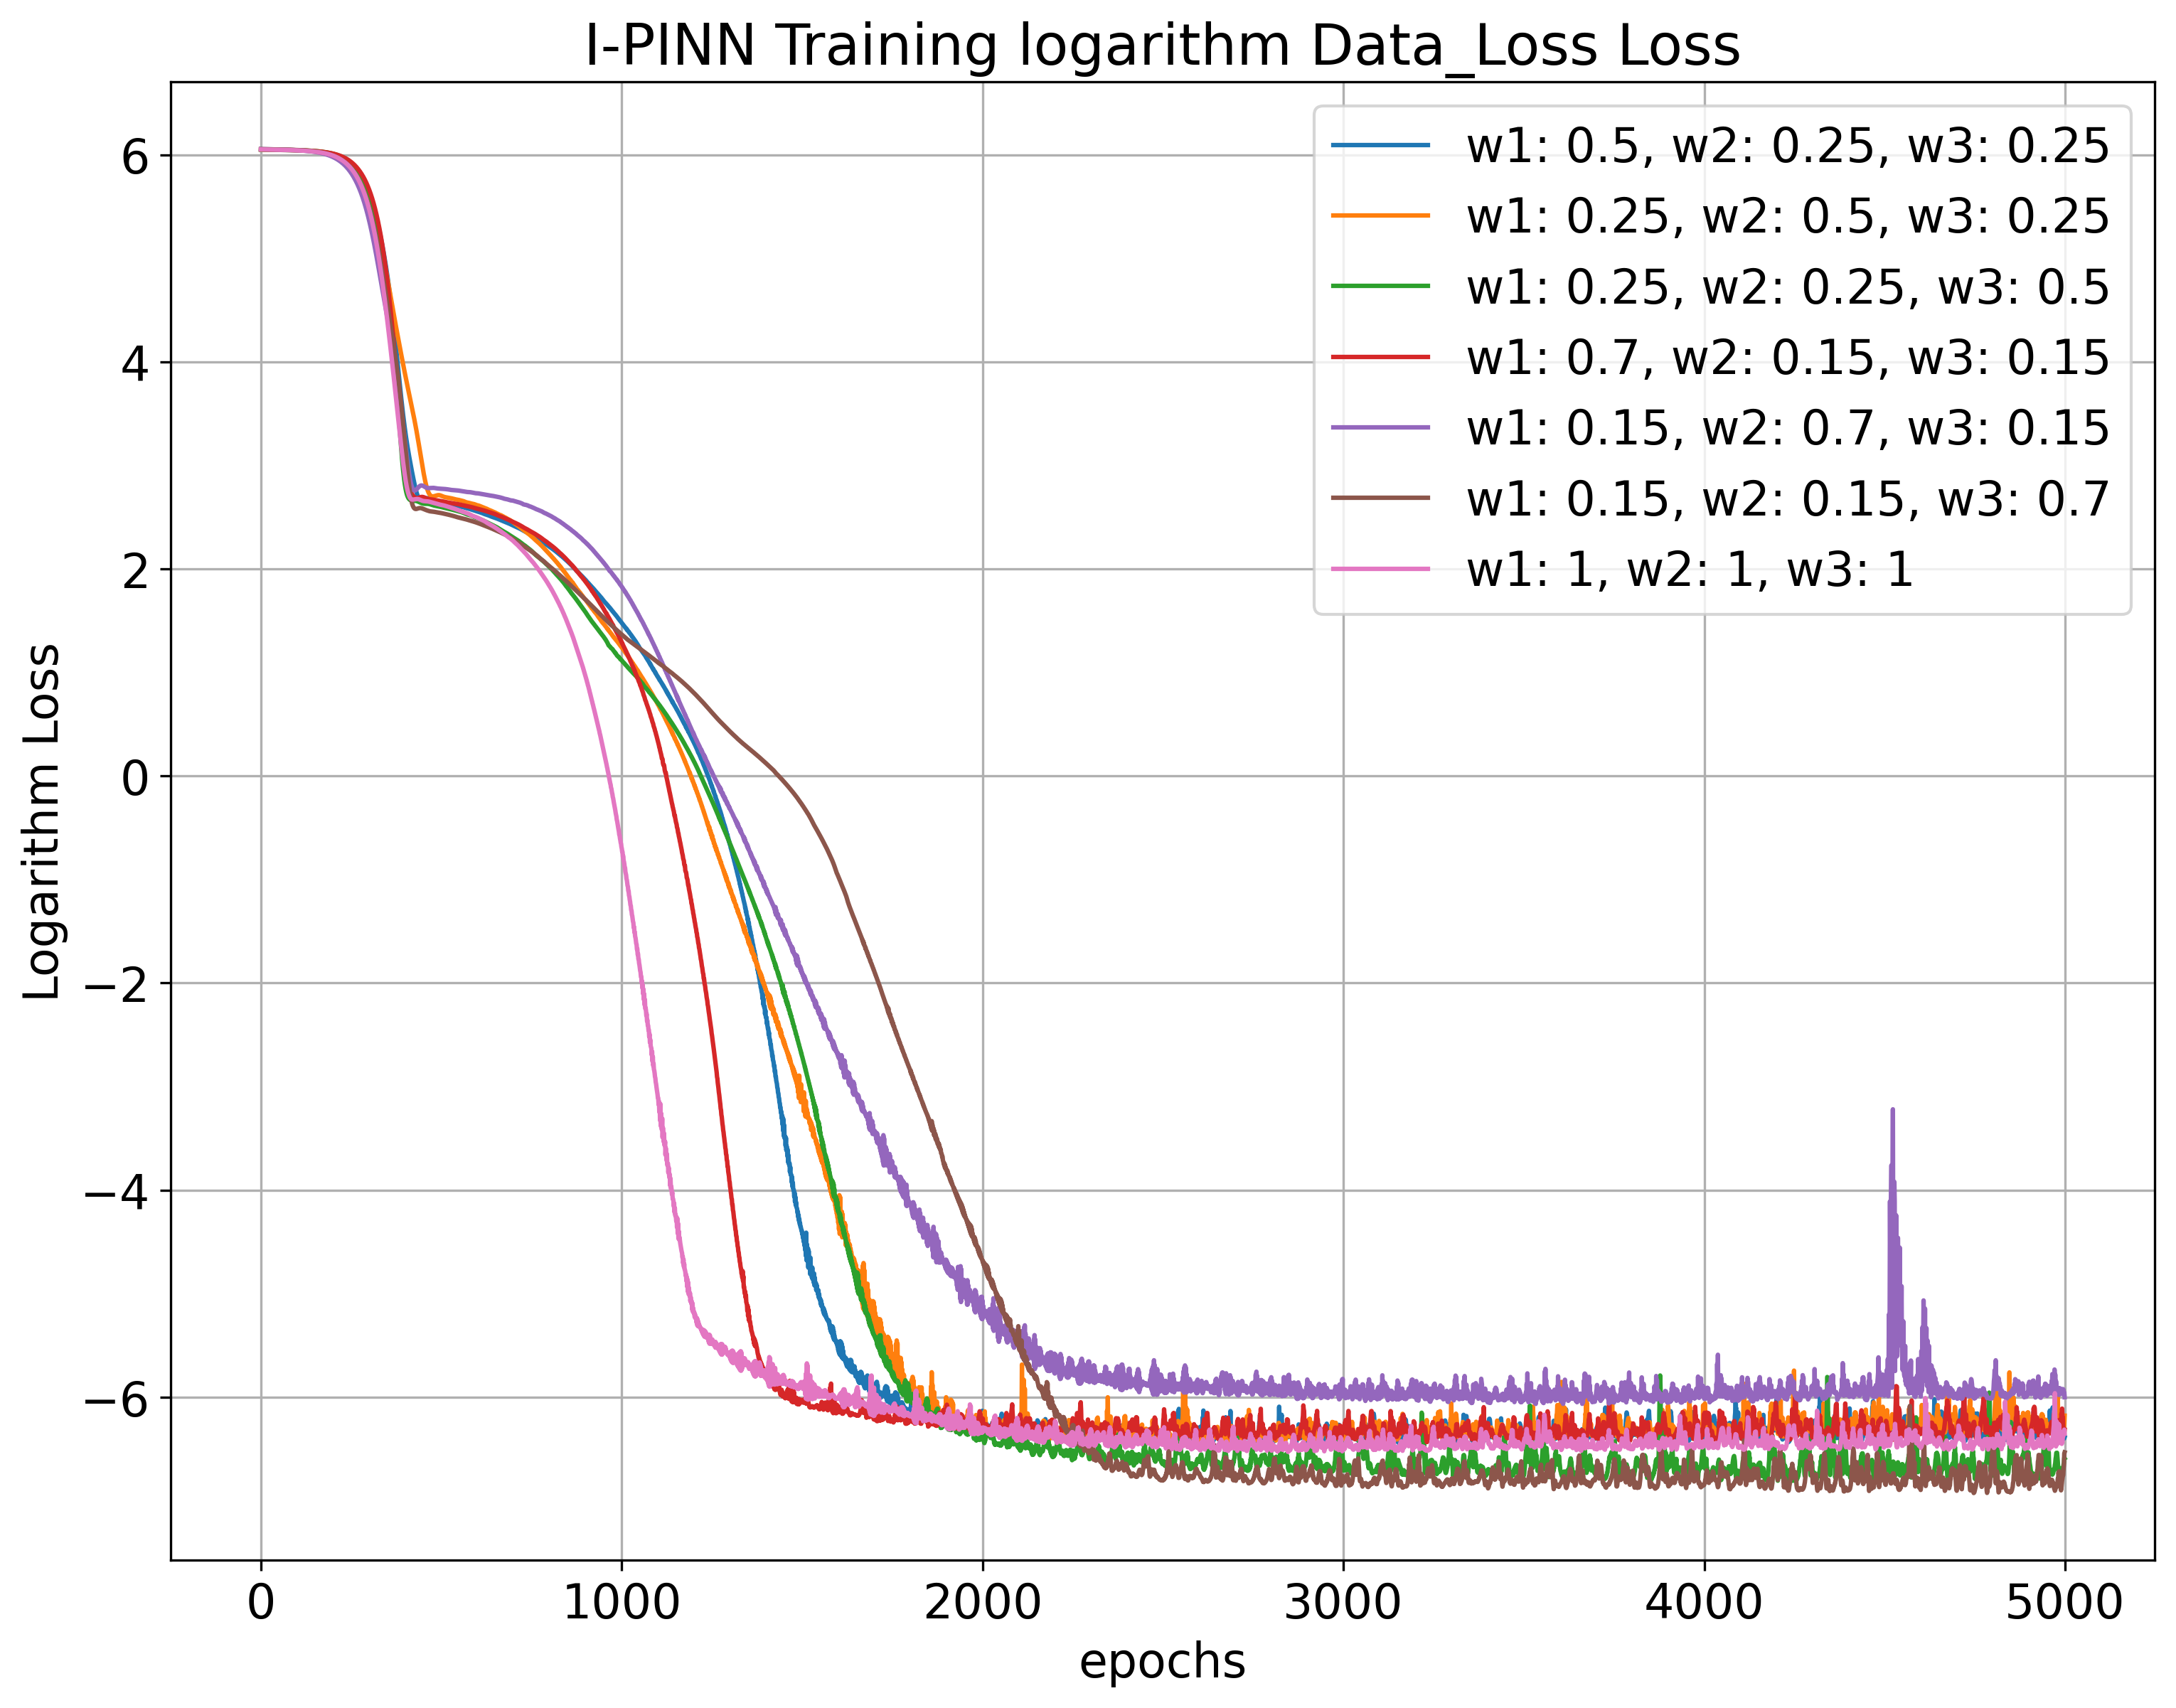

In [25]:
plot_data(ipinn_hists, 'I-PINN')
plot_data(ipinn_hists, 'I-PINN', log=True)

# AWPINN

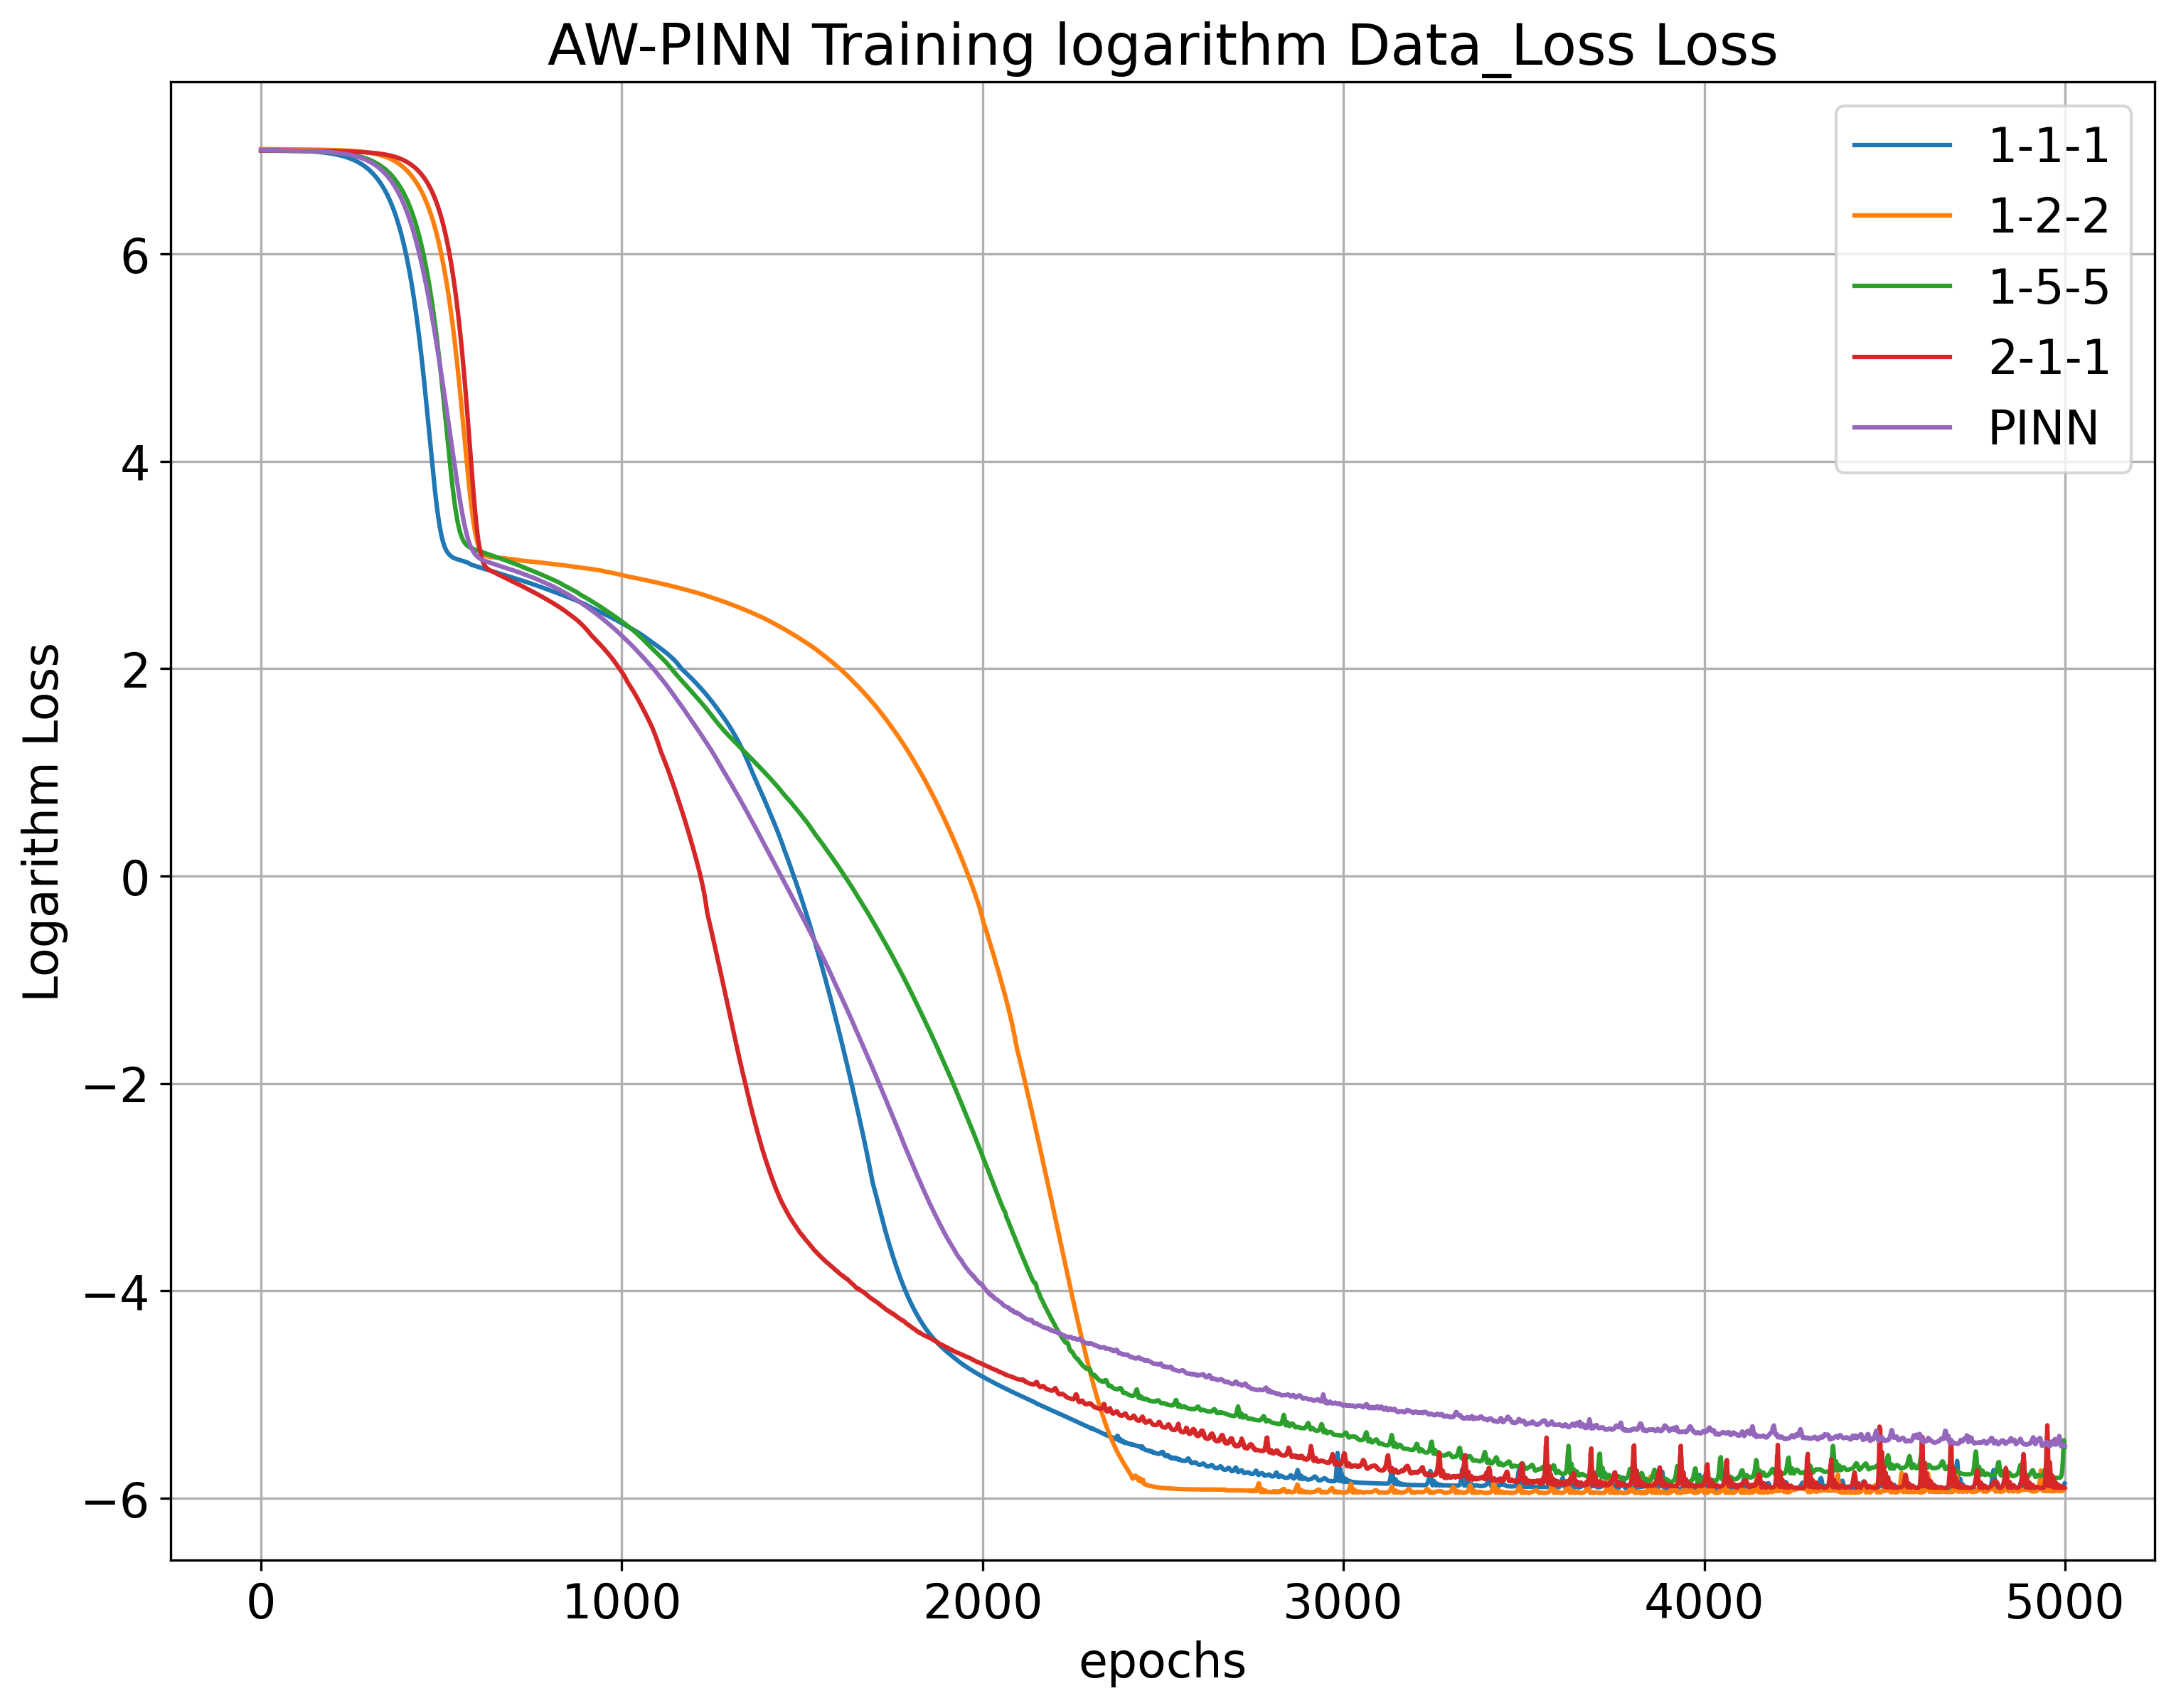

In [23]:
loss_list1 = pd.read_csv('test_loss_weights/awpinn/1-1-1/1-1-1.csv')['MSE_Loss'].to_numpy()
loss_list2 = pd.read_csv('test_loss_weights/awpinn/1-2-2/1-2-2.csv')['MSE_Loss'].to_numpy()
loss_list4 = pd.read_csv('test_loss_weights/awpinn/1-5-5/1-5-5.csv')['MSE_Loss'].to_numpy()
loss_list5 = pd.read_csv('test_loss_weights/awpinn/2-1-1/2-1-1.csv')['MSE_Loss'].to_numpy()
pinn_loss = pd.read_csv('test_final_performance/pinn/average_loss.csv')['Average_MSE_Loss'].to_numpy()
fig = plt.figure(figsize=(12,9))
plt.plot(range(n_epochs), [np.log(item) for item in loss_list1], label='1-1-1')
plt.plot(range(n_epochs), [np.log(item) for item in loss_list2], label='1-2-2')
plt.plot(range(n_epochs), [np.log(item) for item in loss_list4], label='1-5-5')
plt.plot(range(n_epochs), [np.log(item) for item in loss_list5], label='2-1-1')
plt.plot(range(n_epochs), [np.log(item) for item in pinn_loss[:5000]], label='PINN')
plt.xlabel('epochs')
plt.ylabel('Logarithm Loss')
plt.legend()
plt.title(f'AW-PINN Training logarithm {key} Loss')
plt.grid(True)

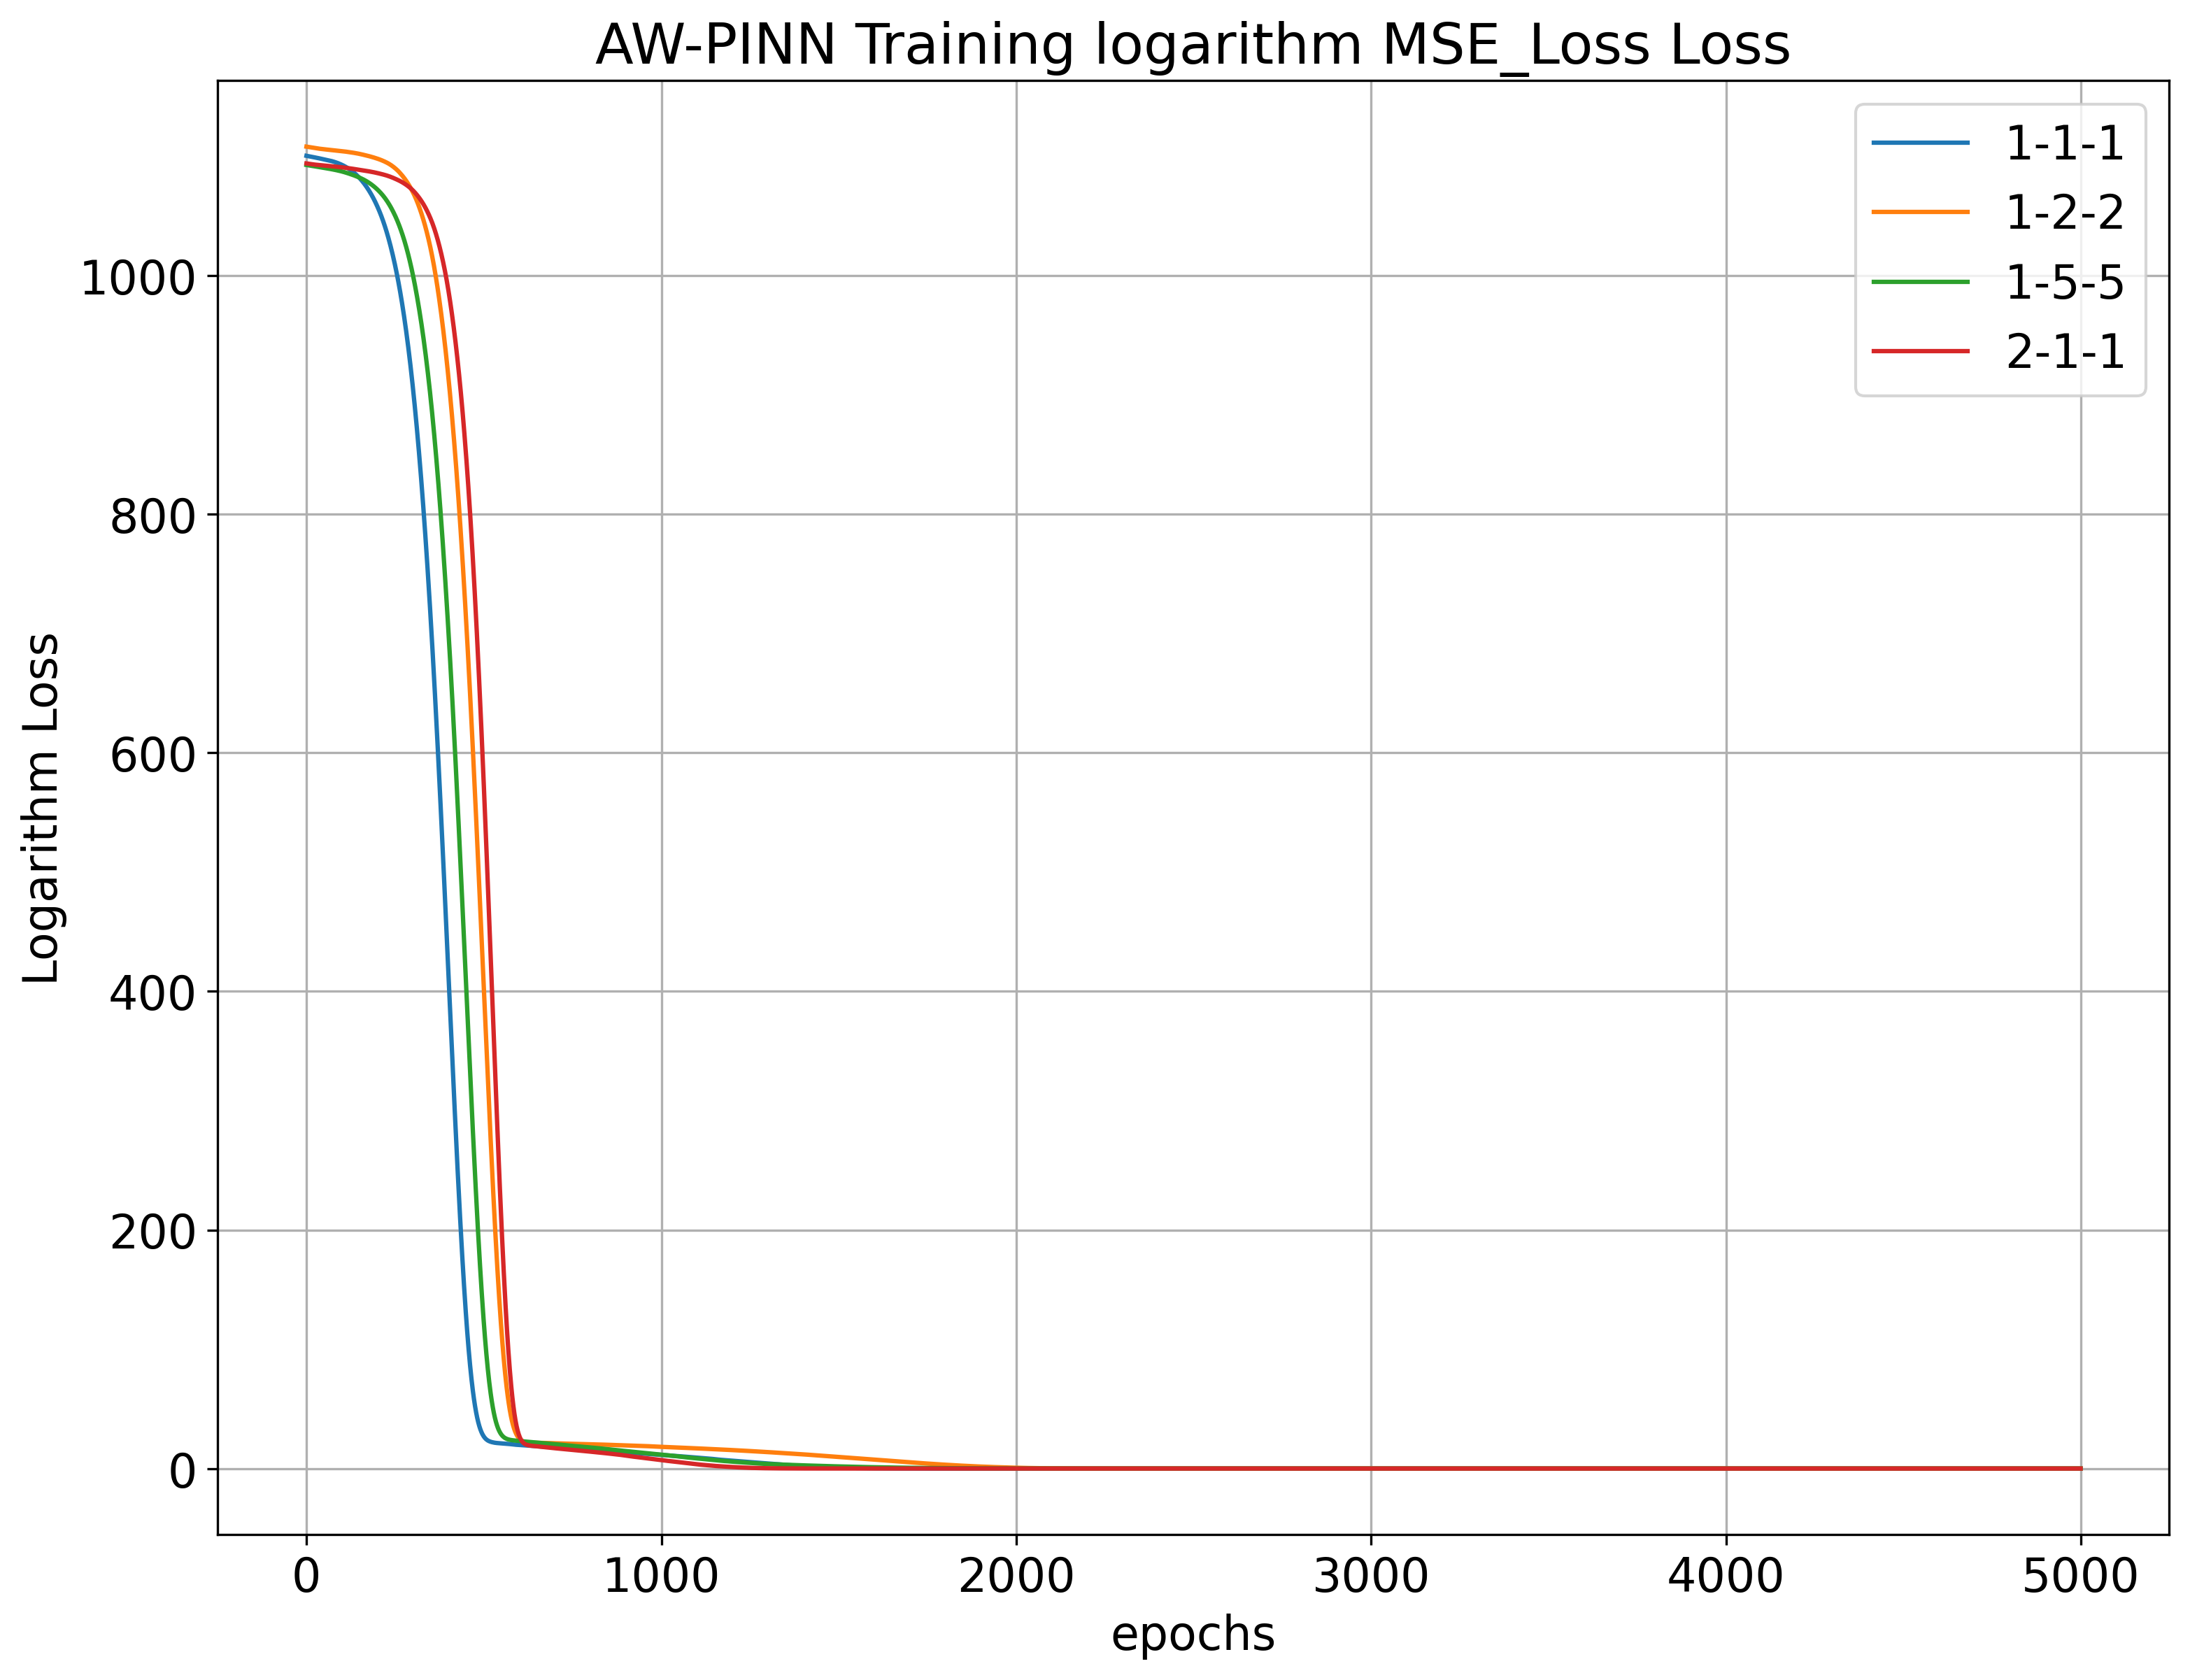

In [14]:
loss_list1 = pd.read_csv('test_loss_weights/awpinn/1-1-1/1-1-1.csv')['MSE_Loss'].to_numpy()
loss_list2 = pd.read_csv('test_loss_weights/awpinn/1-2-2/1-2-2.csv')['MSE_Loss'].to_numpy()
loss_list4 = pd.read_csv('test_loss_weights/awpinn/1-5-5/1-5-5.csv')['MSE_Loss'].to_numpy()
loss_list5 = pd.read_csv('test_loss_weights/awpinn/2-1-1/2-1-1.csv')['MSE_Loss'].to_numpy()
fig = plt.figure(figsize=(12,9))
plt.plot(range(n_epochs), [item for item in loss_list1], label='1-1-1')
plt.plot(range(n_epochs), [item for item in loss_list2], label='1-2-2')
plt.plot(range(n_epochs), [item for item in loss_list4], label='1-5-5')
plt.plot(range(n_epochs), [item for item in loss_list5], label='2-1-1')
plt.xlabel('epochs')
plt.ylabel('Logarithm Loss')
plt.legend()
plt.title(f'AW-PINN Training logarithm {key} Loss')
plt.grid(True)

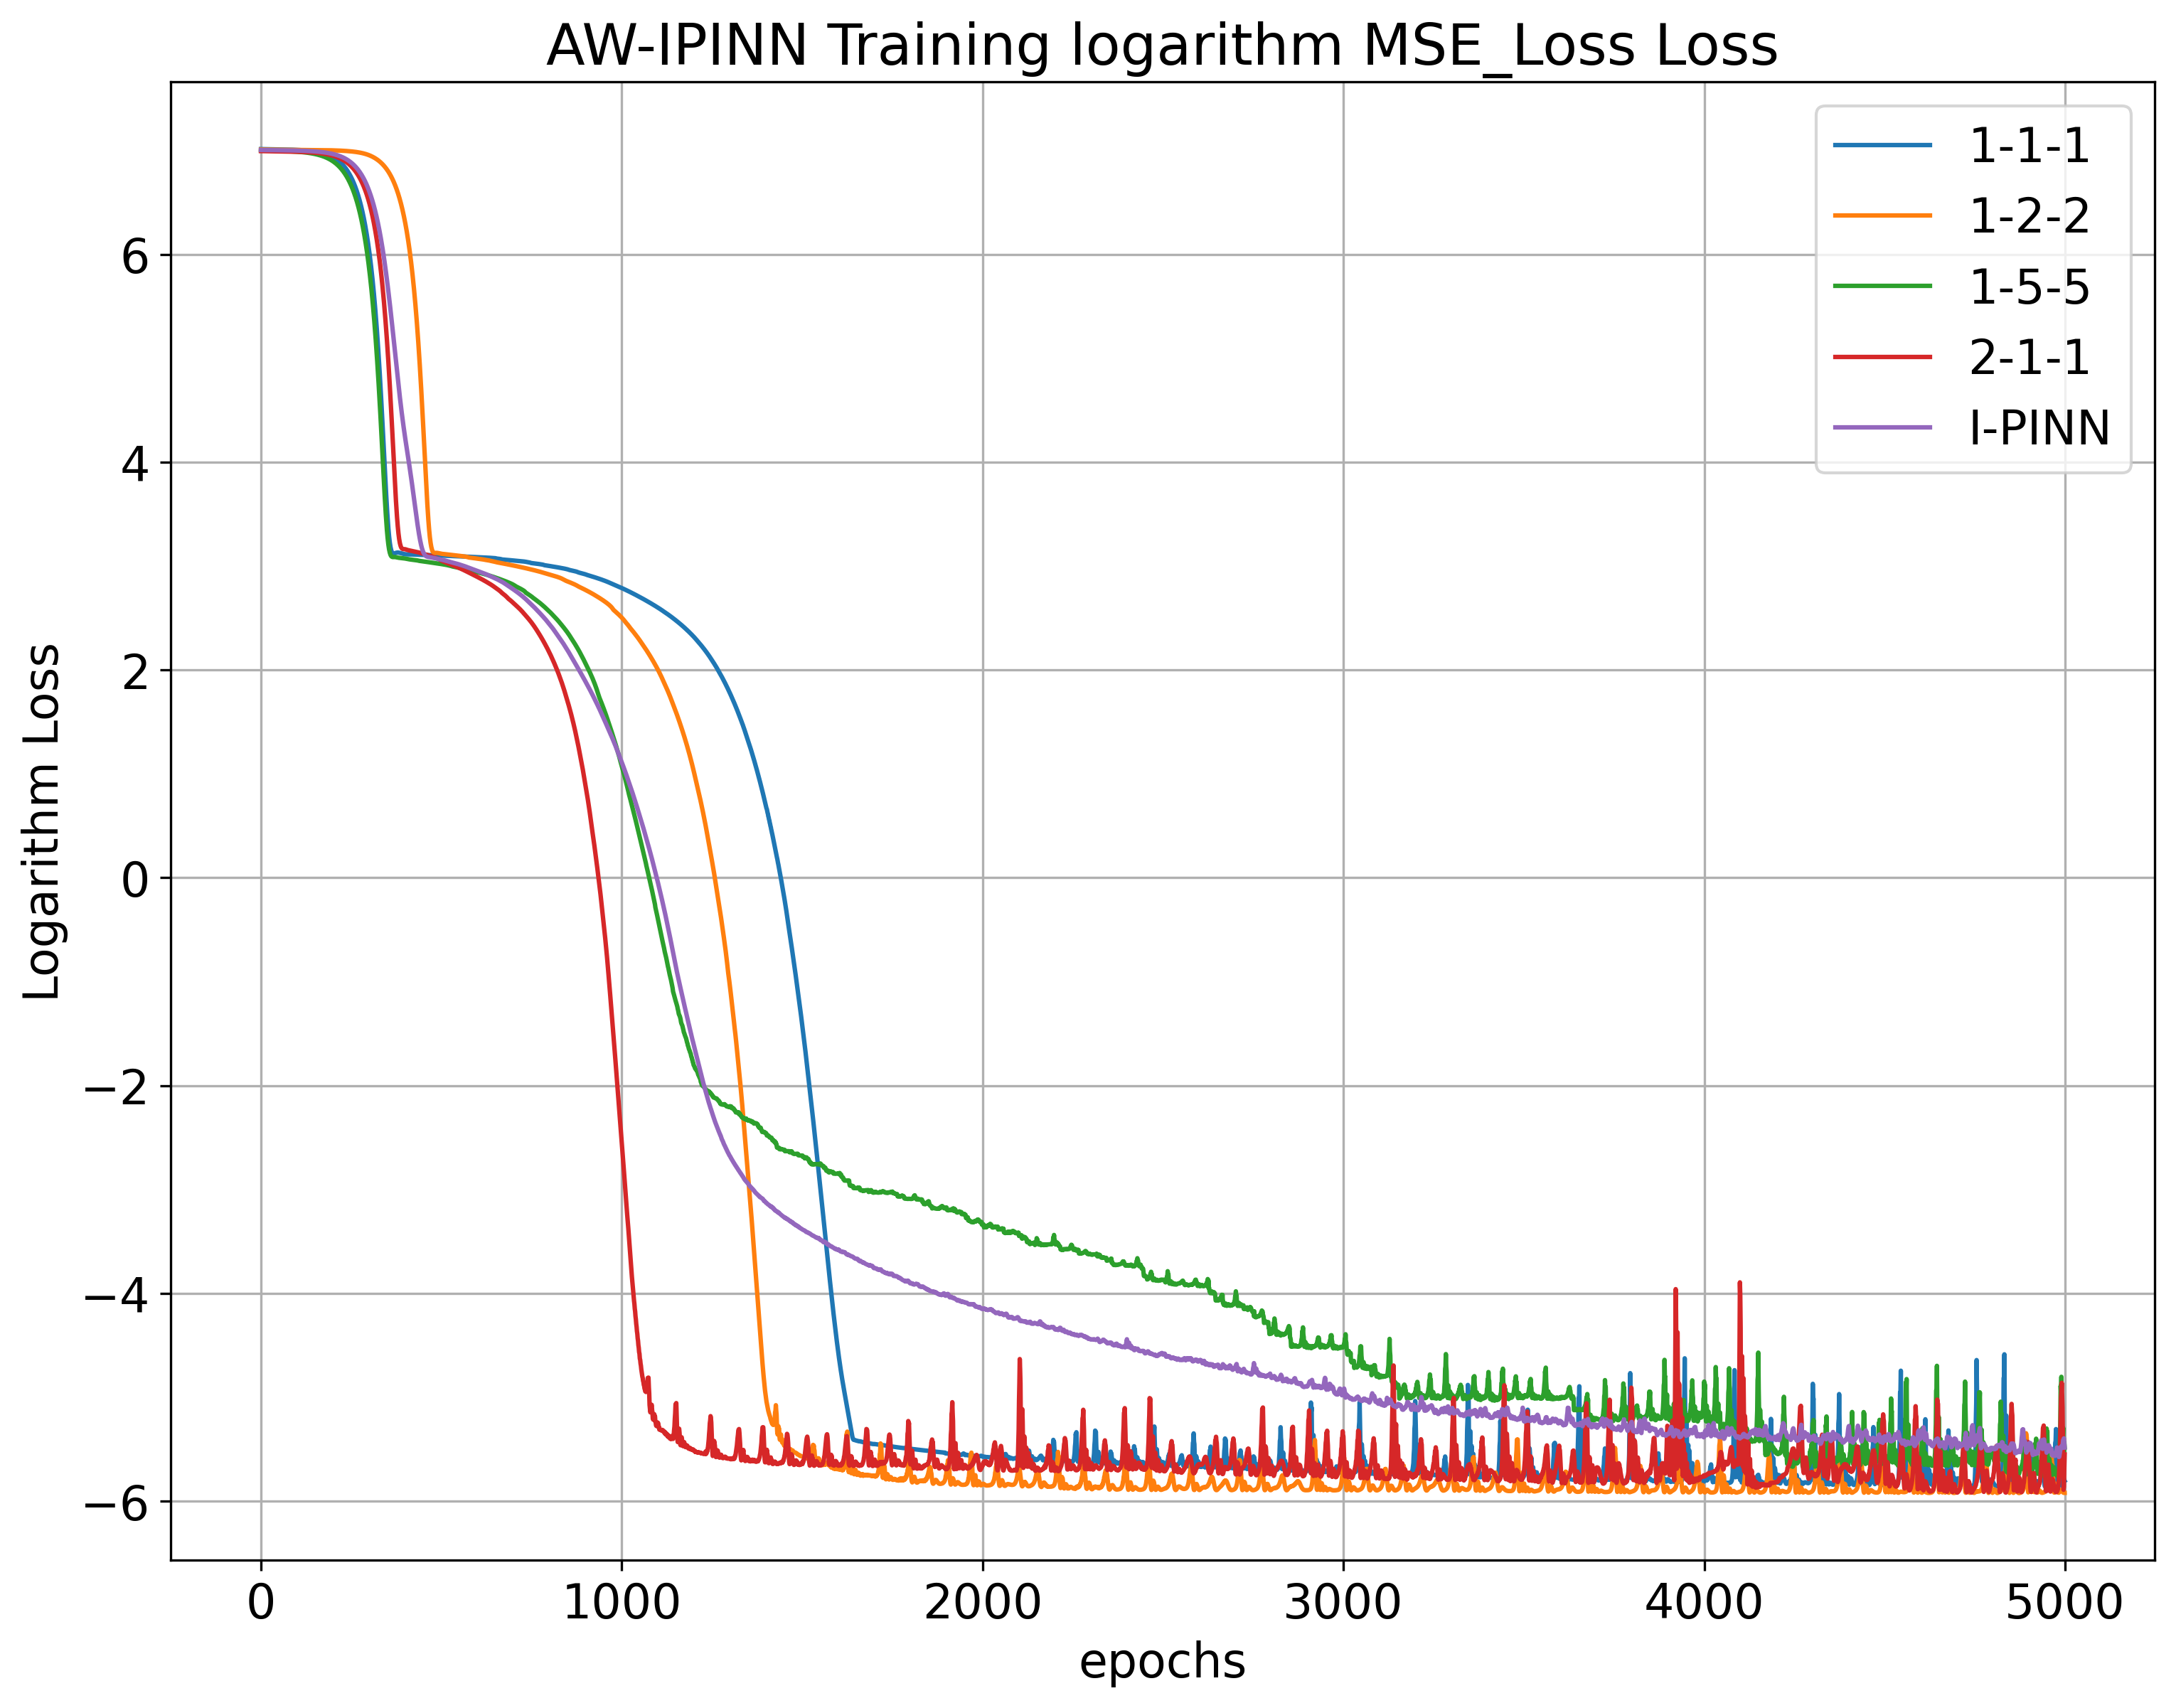

In [4]:
loss_list1 = pd.read_csv('test_loss_weights/awipinn/1-1-1/1-1-1.csv')['MSE_Loss'].to_numpy()
loss_list2 = pd.read_csv('test_loss_weights/awipinn/1-2-2/1-2-2.csv')['MSE_Loss'].to_numpy()
loss_list4 = pd.read_csv('test_loss_weights/awipinn/1-5-5/1-5-5.csv')['MSE_Loss'].to_numpy()
loss_list5 = pd.read_csv('test_loss_weights/awipinn/2-1-1/2-1-1.csv')['MSE_Loss'].to_numpy()
ipinn_loss = pd.read_csv('test_final_performance/ipinn/average_loss.csv')['Average_MSE_Loss'].to_numpy()
fig = plt.figure(figsize=(12,9))
plt.plot(range(n_epochs), [np.log(item) for item in loss_list1], label='1-1-1')
plt.plot(range(n_epochs), [np.log(item) for item in loss_list2], label='1-2-2')
plt.plot(range(n_epochs), [np.log(item) for item in loss_list4], label='1-5-5')
plt.plot(range(n_epochs), [np.log(item) for item in loss_list5], label='2-1-1')
plt.plot(range(n_epochs), [np.log(item) for item in ipinn_loss[:5000]], label='I-PINN')
plt.xlabel('epochs')
plt.ylabel('Logarithm Loss')
plt.legend()
plt.title(f'AW-IPINN Training logarithm {key} Loss')
plt.grid(True)